In [240]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [241]:
classifier = Sequential()

In [242]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [243]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [244]:
classifier.add(Flatten())

In [245]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [246]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [247]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [248]:
from keras.preprocessing.image import ImageDataGenerator

In [276]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('Data/train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('Data/test',target_size = (64, 64),batch_size = 32,class_mode = 'binary')



Found 813 images belonging to 2 classes.
Found 356 images belonging to 2 classes.


In [277]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 500,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 200)

Epoch 1/2
500/500 [==============================] - 152s 304ms/step - loss: 0.2154 - acc: 0.9135 - val_loss: 0.1697 - val_acc: 0.9323
Epoch 2/2
500/500 [==============================] - 152s 304ms/step - loss: 0.0756 - acc: 0.9728 - val_loss: 0.2214 - val_acc: 0.9305


In [239]:
classifier.save('classifier.h5')

In [278]:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
# classifier = load_model('classifier.h5')

import numpy as np
from keras.preprocessing import image
def predict(img_path):
    test_image = image.load_img(img_path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'notfire'
        return False
    else:
        prediction = 'fire'
        return True


img3 = predict('Data/sat/image3.jpg')
img8 = predict('Data/sat/image8.jpg')
img11 = predict('Data/sat/image11.jpg')
print("img3 = ", img3)
print("img3 = ", img3)
print("img3 = ", img3)

img3 =  True
img3 =  True
img3 =  True


In [279]:
import numpy as np
import scipy as sp
import cv2
from keras.preprocessing import image
def predict_part(inp_arr_image):
    test_image = cv2.resize(inp_arr_image, (64,64))
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'notfire'
        return False
    else:
        prediction = 'fire'
        return True

test_image = image.load_img('Data/sat/fire.jpg')
test_image = image.img_to_array(test_image)
# test_image = np.array(test_image, np.int32)
# predict_part(test_image[0:100, 0:100, :])

In [280]:
%matplotlib inline

In [281]:
import matplotlib.pyplot as plt

(500, 750, 3)
(500, 750, 3)


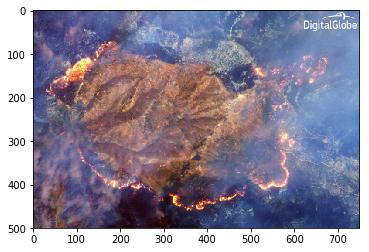

In [282]:
def plot_image(img_array):
    img = np.array(img_array, np.int32)
    plt.imshow(img)
    

test_image = image.load_img('Data/sat/image3.jpg')
test_image = image.img_to_array(test_image)

# plt.imshow(test_image[0:100, 0:100, :])
# print(test_image.shape)
# predict(test_image[0:100, 0:100, :])
print(test_image.shape)
# cv2.resize(test_image, )
# test_image = cv2.resize(test_image, (128, 128))
# plot_image(test_image)
no_img = get_img_array('Data/sat/no_fire.jpg')
no_img = cv2.resize(fire_img, (750, 500) ) #(750, 500)
# fire_img = cv2.resize(fire_img, (1000, 1000) ) #(750, 500)
# fire_img = cv2.resize(fire_img, (750, 500) ) #(750, 500)
plot_image(fire_img)
print(fire_img.shape)

In [283]:
test_image = image.load_img('Data/sat/image3.jpg')
test_image = image.img_to_array(test_image)

# plt.figure()
# plt.subplot(121), plt.imshow(a), plt.title(title1)
# plt.show()  
def get_cells_img(np_arr_img, n=64): # considers all n X n grids
    sub_imgs = []
    for row in range((np_arr_img.shape[0]//n)+1):
        for col in range((np_arr_img.shape[1]//n)+1):
            c_0 = col*n
            c_1 = min((c_0+n), np_arr_img.shape[1])
            r_0 = row*n
            r_1 = min((r_0+n), np_arr_img.shape[0])
    #         print(c_0, c_1, " | ", r_0, r_1)
            sub_imgs.append(np_arr_img[r_0:r_1, c_0:c_1,: ])
    return sub_imgs

def get_img_array(path):
    img = image.load_img(path)
    return image.img_to_array(img)

fire_img = get_img_array('Data/sat/image11.jpg')
no_img = get_img_array('Data/sat/no_fire.jpg')

fire_img = cv2.resize(fire_img, (750, 500) )
no_img = cv2.resize(no_img, (750, 500) )

fire_pred = [predict_part(img) for img in get_cells_img(fire_img, n=128)]
no_fire_pred = [predict_part(img) for img in get_cells_img(no_img, n=128)]

In [284]:
fire_img_cells = get_cells_img(fire_img, 128)
no_fire_img_cells = get_cells_img(no_img, 128)
print(fire_img.shape)
print(no_img.shape)
print(len(fire_img_cells))
print(len(no_fire_img_cells))
# for i in x:
#     print(i.shape)

(500, 750, 3)
(500, 750, 3)
24
24


In [285]:
fire_img_cells[0].shape

(128, 128, 3)

In [286]:
import pandas as pd

# def ratio(series):
#     print("fire ratio: ", series.value_counts()[True]/(series.value_counts()[True]+series.value_counts()[False]) )
    
# pn = pd.Series(no_fire_pred)
# py = pd.Series(fire_pred)

# print("fire", '*'*20)
# print(py.value_counts())
# ratio(py)

# print("no fire", '*'*20)
# print(pn.value_counts())
# ratio(pn)
fire_cnt = 0
for p in no_fire_pred:
        if p:
            fire_cnt += 1

no_cnt = len(fire_pred) - fire_cnt

print("Fire: ", fire_cnt, "non-fire:", no_cnt)

Fire:  17 non-fire: 7


In [126]:
print((500*750)/(64*64))
test_image =get_img_array('Data/sat/image3.jpg')
print(test_image.shape)

91.552734375
(500, 750, 3)


25


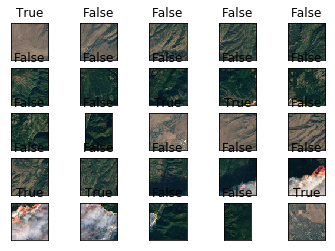

In [106]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    print(len(axes.flat))
    for i, ax in enumerate(axes.flat): 
#         if img[i].shape == (32, 32, 3):
        ax.imshow(img[i])
#         else:
#             ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])
plt_sub_imgs = [np.array(img, np.int32) for img in sub_imgs]
plot_images(plt_sub_imgs[:25], preds[:25], 5, 5)

17
22


IndexError: list index out of range

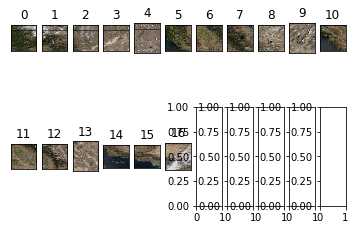

In [287]:
fire_cells = []
for i, p in enumerate(no_fire_pred):
    if p == True:
        fire_cells.append(no_fire_img_cells[i])
        
plt_sub_imgs = [np.array(img, np.int32) for img in fire_cells]
print(len(plt_sub_imgs))
plot_images(plt_sub_imgs[:], np.arange(len(plt_sub_imgs)), 2,11)

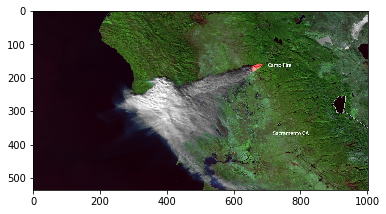

In [150]:
# for c in plt_sub_imgs[0]:
plt.imshow(np.array(fire_img[:-64,:-64,:], np.int32))